# MachineLearning Project on Alzheimers Disease and Healthy Aging

## Predicting The Cause of Occuring AlzheimersDisease

<img src="alzheimers">

## Table of Contents

### 1.Introduction 2.Goal Of The Project 3.Data PreProcessing 4.Data Story 5.Conclusion

## 1. Introduction

This data collected by The_Behavioral_Risk_Factor_Surveillance_System (BRFSS)contains results of health related telephone surveys to monitor health-related risk behaviors, chronic health conditions, and use of preventive services of the US residents. In order to conduct the BRFSS, states obtain samples of telephone numbers from CDC.
Household sampling requires interviewers to collect information on the number of adults living within a residence and then select randomly from all eligible adults. Cellular telephone respondents are weighted as single adult households.This survey was conducted from 2015 to 2022.


The telephonic survey was conducted in the following areas of United States of America:
'Pennsylvania', 'South Dakota', 'Idaho', 'Maryland', 'Wisconsin' ,'Iowa', 'Oklahoma', 'Arizona,' 'Ohio,' 'South', 'Nevada', 'Georgia', 'Northeast,'
 'Colorad,o' 'Orego,n' 'Arkansa,s' 'New Yor,
 'United States, DC & Territori,es' 'Puerto Ri,co' 'Gua,m' 'Kans,'
 'Washing,ton' 'Verm,ont' 'Haw,aii' 'District of Colum,bia' 'Ala,a'
 'New Hamps,hire' 'Mon,tana' 'New Me,xico' 'Ala,bama' 'Louisi,ana' 'Kent,ky'
 ,'Utah' 'New Je,rsey' 'Tenn,essee' 'M,aine' ',Texas' 'West Vir,inia'
 'Missi,ssippi' 'Rhode ,Island' 'Vir,ginia' 'Neb,raska' 'Cali,ornia'
 'Il,linois' 'Conne,cticut' 'North, Dakota' 'Massac,husetts' ',orida'
 'South C,arolina' 'North ,Carolina' ,'Wyomin,g' 'West' ,'Midwest' ',higan'
 'Virgi,n Islands' ',Missouri' ,'    elaware' ',Minnesota'.The participants answered 39 questions according to that classified in 7 classes i.e Caregiving, Cognitive Decline
Mental Health,	Nutrition/Physical Activity/Obesity, Screenings and Vaccines,Smoking and Alcohol Use,and Overall Health	. 'Indiana']

## 2.Goal Of The Project

Alzheimer's disease is a brain disorder that slowly destroys memory and thinking skills, and eventually, the ability to carry out the simplest tasks. In most people with Alzheimer's, symptoms first appear later in life.If we can predict the cause of this disease we can prevent or reduce its occurance in our elderly.The goal of the project is to predict the causes of Alzheimers.

## 3.Data Preprocessing

## Steps in Data Preprocessing

**1.Acquire the dataset 2.Importing the libraries 3.Importing the dataset 4.Finding the Missing data 5.Finding and handling outliers 6.Encoding the categorical data 7.Featuring selection 8.Splitting the dataset 9.Feature scaling.**

### Importance of Data Preprocessing or Data cleaning:

**Data cleaning refers to the process of removing unwanted variables and values from our dataset and getting rid of any irregularities in it.Such irregularities can disproportionality skew our data and hence adversely effect the result. Gaining general knowledge about the data including its values, kinds, number of rows and columns, and missing values is the primary objective of data understanding.**

## 1. DATASET:

https://healthdata.gov/dataset/Alzheimer-s-Disease-and-Healthy-Aging-Data

## Dataset Desription

The Alzheimer-s-Disease-and-Healthy-Aging-Dataset contains 284142 rows and 31 columns.

## 2.Importing All Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 

import joblib

## 3.Loading The Dataset

In [2]:
# import dataset
df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
df

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


## Understanding The Data

In [4]:
#Displays the shape of the data-no.of rows and columns
df.shape

(284142, 31)

In [7]:
#Displays the first 5 rows
df.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [9]:
#Displays the last 5 rows
df.tail()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS
284141,BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,%,...,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C02,TNC02,Q02,56,AGE,5064,RACE,NAA


In [11]:
#facilitates comprehension of the data type and related information, such as the quantity of records in each column,
#whether the data is null or not, the type of data, and the dataset’s memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       284142 non-null  object 
 1   YearStart                   284142 non-null  int64  
 2   YearEnd                     284142 non-null  int64  
 3   LocationAbbr                284142 non-null  object 
 4   LocationDesc                284142 non-null  object 
 5   Datasource                  284142 non-null  object 
 6   Class                       284142 non-null  object 
 7   Topic                       284142 non-null  object 
 8   Question                    284142 non-null  object 
 9   Data_Value_Unit             284142 non-null  object 
 10  DataValueTypeID             284142 non-null  object 
 11  Data_Value_Type             284142 non-null  object 
 12  Data_Value                  192808 non-null  float64
 13  Data_Value_Alt

### DATASET OVERVIEW: 284142 rows(entries), 31 columns(features -.Mix of integers(3),float64(4),object(24) data types.

In [13]:
#Display the features of the dataset
df.columns

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

In [15]:
#statistical summary of the data set which gives the count, mean, standard deviation, minimum,
#and quartiles for each numerical column. The dataset’s central tendencies and spread are briefly summarized.
df.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,284142.000000,284142.000000,192808.000000,192808.000000,192597.000000,192597.000000,284142.000000
mean,2018.596065,2018.657735,37.676757,37.676757,33.027824,42.595333,800.322677
std,2.302815,2.360105,25.213484,25.213484,24.290016,26.156408,2511.564977
min,2015.000000,2015.000000,0.000000,0.000000,-0.700000,1.300000,1.000000
25%,2017.000000,2017.000000,15.900000,15.900000,12.600000,19.700000,19.000000
50%,2019.000000,2019.000000,32.800000,32.800000,27.000000,38.900000,34.000000
75%,2021.000000,2021.000000,56.900000,56.900000,49.400000,64.600000,49.000000
max,2022.000000,2022.000000,100.000000,100.000000,99.600000,100.000000,9004.000000


## 4.Finding and Handling the Missing Values

In [17]:
#displays the  no.of null values(if there) in each columns
df.isnull().sum()

RowId                              0
YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                    0
DataValueTypeID                    0
Data_Value_Type                    0
Data_Value                     91334
Data_Value_Alt                 91334
Data_Value_Footnote_Symbol    174166
Data_Value_Footnote           174166
Low_Confidence_Limit           91545
High_Confidence_Limit          91545
StratificationCategory1            0
Stratification1                    0
StratificationCategory2        36873
Stratification2                36873
Geolocation                    30489
ClassID                            0
TopicID                            0
QuestionID                         0
LocationID                         0
S

In [19]:
df1=df.copy()
df1.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


## Handling Missing Values Using any measures(removing/ replace the values with 0/ mean/median/mode).

In [21]:
#Dropping columns that are having more than 60% null values
df_dropped = df1.drop(columns=['Data_Value_Footnote_Symbol','Data_Value_Footnote'],inplace=True)
df1.columns

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

In [23]:
#Handling the null values with fillna() 
fill_values = {
    'Data_Value': 0,
    'Data_Value_Alt': 0,
    'Low_Confidence_Limit': 0,
    'High_Confidence_Limit': 0,
    'StratificationCategory2': 0,
    'Stratification2': 0,
    'Geolocation': 0,
    
}
df1.fillna(value=fill_values, inplace=True)

In [25]:
#Checking null values after imputation
df1.isnull().sum()

RowId                        0
YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Datasource                   0
Class                        0
Topic                        0
Question                     0
Data_Value_Unit              0
DataValueTypeID              0
Data_Value_Type              0
Data_Value                   0
Data_Value_Alt               0
Low_Confidence_Limit         0
High_Confidence_Limit        0
StratificationCategory1      0
Stratification1              0
StratificationCategory2      0
Stratification2              0
Geolocation                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategoryID1    0
StratificationID1            0
StratificationCategoryID2    0
StratificationID2            0
dtype: int64

### Checking duplicates

Detecting duplicates using duplicated() function.

In [27]:
df1.duplicated().sum()

0

In [29]:
#  Renaming the columns 
df1.rename(columns={
    'Stratification1': 'Age',          
    'StratificationID1': 'AgeGroup',
    'Topic':'Overall_Health_Status'
}, inplace=True)

df1.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Overall_Health_Status,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


### Univariate Analysis

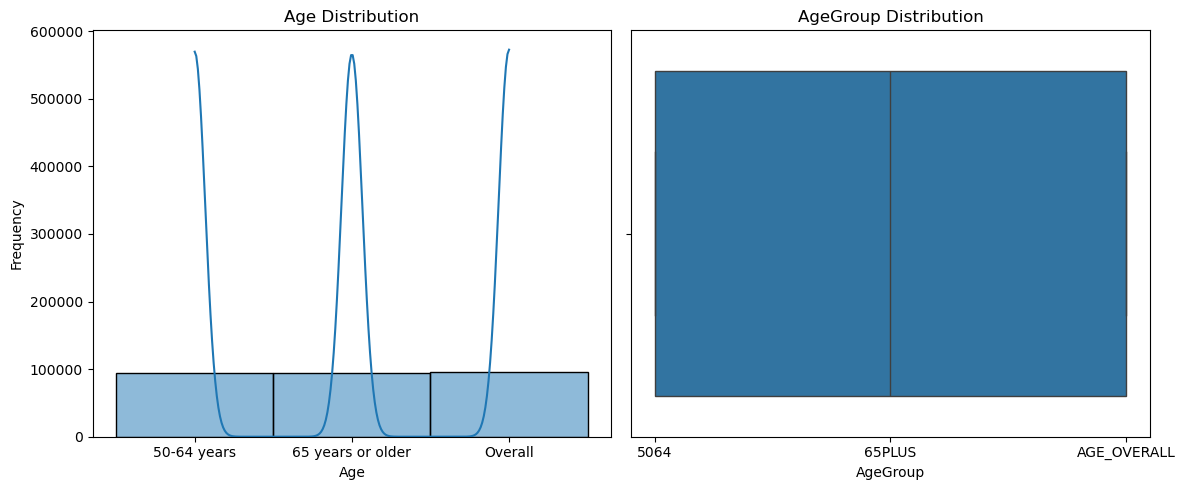

In [31]:
# Univariate Analysis - Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df1['Age'], bins=8, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Univariate Analysis - Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['AgeGroup'])
plt.title('AgeGroup Distribution')
plt.xlabel('AgeGroup')

plt.tight_layout()
plt.show()

In [33]:
df1["Overall_Health_Status"].value_counts()

Overall_Health_Status
Frequent mental distress                                                                                  11092
Current smoking                                                                                           11092
Influenza vaccine within past year                                                                        11092
Lifetime diagnosis of depression                                                                          11092
Obesity                                                                                                   11092
Physically unhealthy days (mean number of days)                                                           11092
No leisure-time physical activity within past month                                                       11092
Self-rated health (good to excellent health)                                                              11091
Binge drinking within past 30 days                                                

In [35]:
Overall_Health_Status =39
total_patients =284142
patients = pd.Series(df1["Overall_Health_Status"].value_counts())
percentage =(patients/total_patients)*100
result = pd.concat([patients,percentage.round(2)],axis=1,keys = ["no of patients","percentage"])
result

,no of patients,percentage
Overall_Health_Status,,
Frequent mental distress,11092,3.90
Current smoking,11092,3.90
Influenza vaccine within past year,11092,3.90
Lifetime diagnosis of depression,11092,3.90
Obesity,11092,3.90
Physically unhealthy days (mean number of days),11092,3.90
No leisure-time physical activity within past month,11092,3.90
Self-rated health (good to excellent health),11091,3.90
Binge drinking within past 30 days,11091,3.90


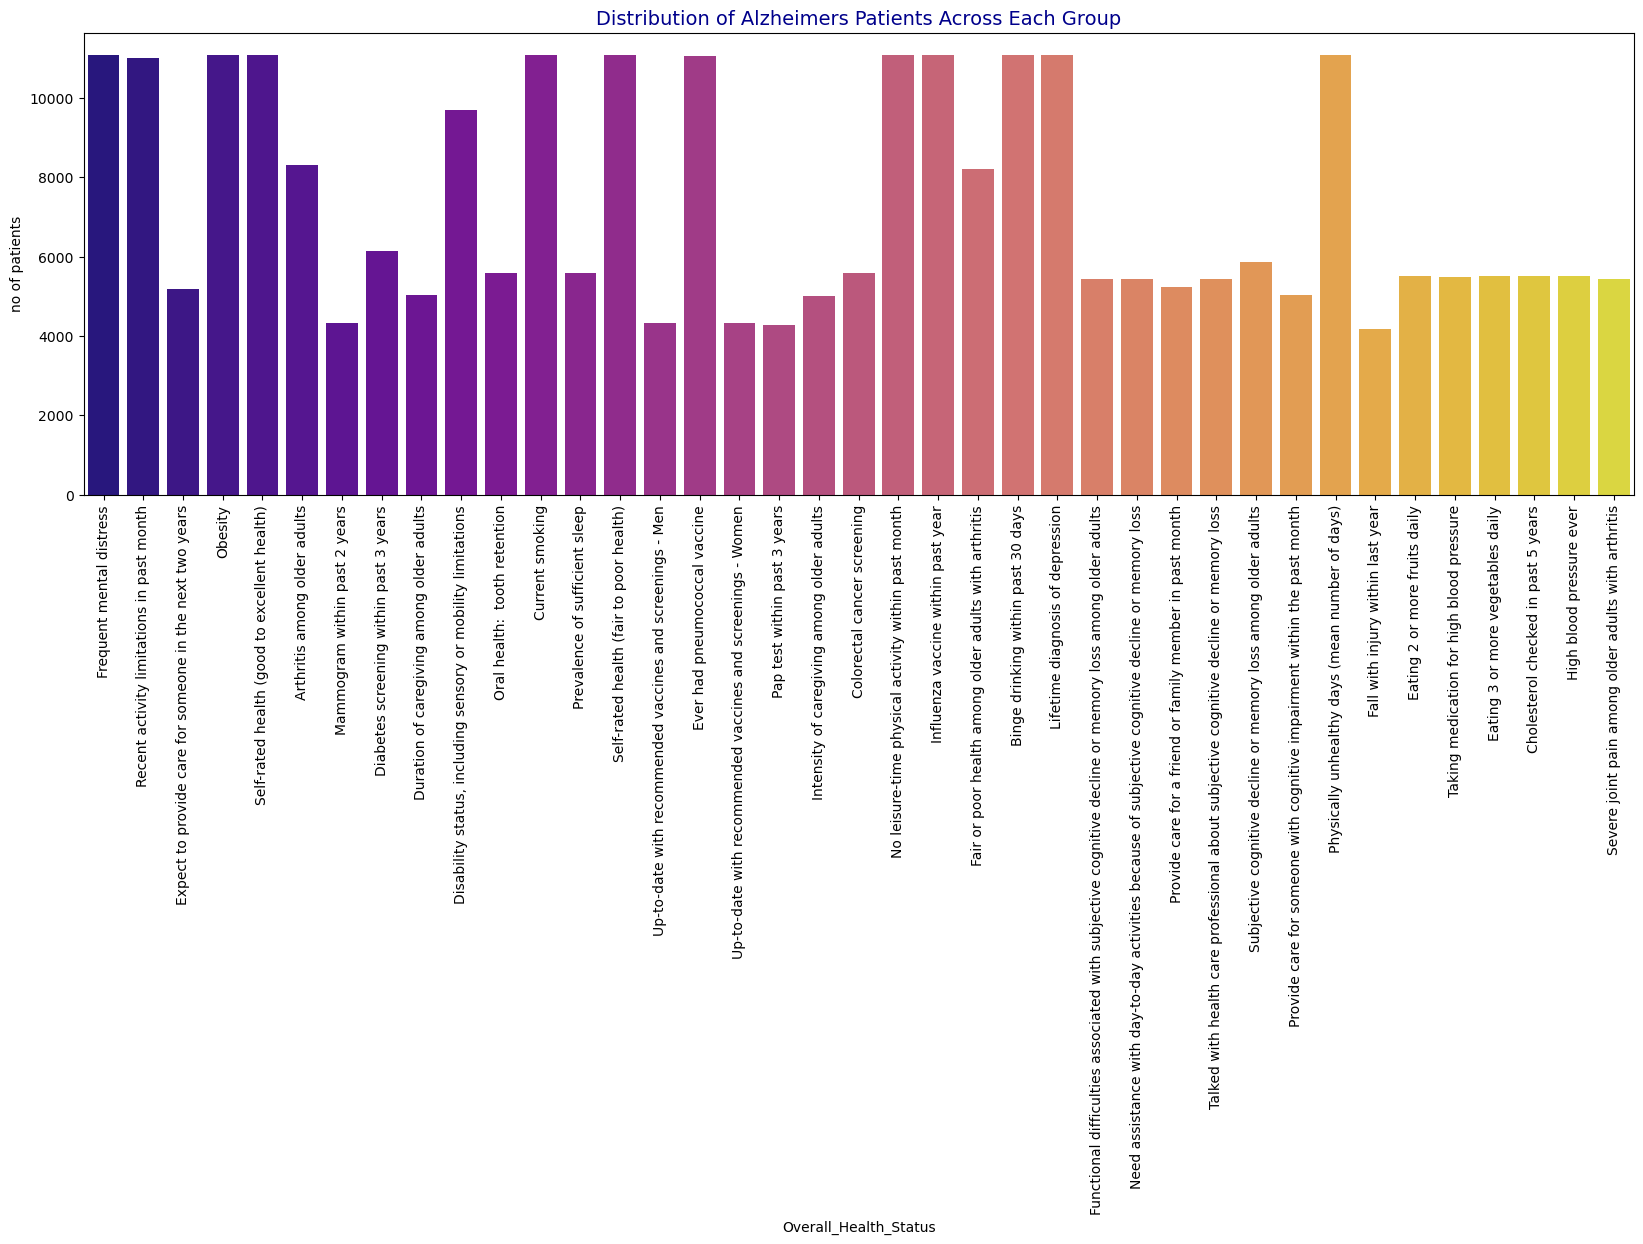

In [37]:
#Univariate Analysis
# Create the plot
import seaborn as sns

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.xlabel('Overall_Health_Status')
plt.ylabel('no of patients')
sns.countplot(x ='Overall_Health_Status',data = df1,hue = 'Overall_Health_Status',palette = 'plasma')
plt.title('Distribution of Alzheimers Patients Across Each Group',fontsize=14,color="darkblue")
plt.show()

**Data Story:The countplot analysis based on the Overall Health Status of the Alzheimers patients,reveals that out of the 39 groups 7 groups have the highest count("Frequent mental distress,Current smoking,Influenza vaccine within past year, Lifetime diagnosis of depression,Obesity, Physically unhealthy days (mean number of days)and No leisure-time physical activity within past month") number of patients that is 11092 with the percentage 3.90 and closely followed by 3 groups i.e "Self-rated health (good to excellent health),Binge drinking within past 30 days,Self-rated health (fair to poor health)" as 11091. The remaining 29 groups have varying counts from 11051 to 4173.**

In [39]:
#grouping Alzheimers Patients  by Location
grp_location = df1.groupby("LocationDesc")
for location, group in grp_location:
    print(f"location:{location}")
    print(group[["Overall_Health_Status","LocationDesc"]])
    print("\n")

location:Alabama
                                  Overall_Health_Status LocationDesc
56                         Pap test within past 3 years      Alabama
57                         Pap test within past 3 years      Alabama
233                    Lifetime diagnosis of depression      Alabama
254                  Binge drinking within past 30 days      Alabama
598        Self-rated health (good to excellent health)      Alabama
...                                                 ...          ...
281366  Physically unhealthy days (mean number of days)      Alabama
282111  Physically unhealthy days (mean number of days)      Alabama
282884  Physically unhealthy days (mean number of days)      Alabama
283612  Physically unhealthy days (mean number of days)      Alabama
283752  Physically unhealthy days (mean number of days)      Alabama

[4807 rows x 2 columns]


location:Alaska
                                    Overall_Health_Status LocationDesc
43      Up-to-date with recommended vacci

In [41]:
df1["LocationDesc"].value_counts()

LocationDesc
United States, DC & Territories    6132
West                               6126
Northeast                          6102
Midwest                            6099
South                              6030
Oregon                             5916
New York                           5787
Utah                               5368
Ohio                               5311
Hawaii                             5164
Maryland                           5132
Georgia                            5124
Michigan                           5113
Nevada                             4950
Maine                              4949
Texas                              4947
Mississippi                        4939
Virginia                           4936
Wisconsin                          4928
West Virginia                      4856
Tennessee                          4844
Pennsylvania                       4810
South Carolina                     4807
Alabama                            4807
New Mexico                 

unique positions : ['Pennsylvania' 'South Dakota' 'Idaho' 'Maryland' 'Wisconsin' 'Iowa'
 'Oklahoma' 'Arizona' 'Ohio' 'South' 'Nevada' 'Georgia' 'Northeast'
 'Colorado' 'Oregon' 'Arkansas' 'New York'
 'United States, DC & Territories' 'Puerto Rico' 'Guam' 'Kansas'
 'Washington' 'Vermont' 'Hawaii' 'District of Columbia' 'Alaska'
 'New Hampshire' 'Montana' 'New Mexico' 'Alabama' 'Louisiana' 'Kentucky'
 'Utah' 'New Jersey' 'Tennessee' 'Maine' 'Texas' 'West Virginia'
 'Mississippi' 'Rhode Island' 'Virginia' 'Nebraska' 'California'
 'Illinois' 'Connecticut' 'North Dakota' 'Massachusetts' 'Florida'
 'South Carolina' 'North Carolina' 'Wyoming' 'West' 'Midwest' 'Michigan'
 'Virgin Islands' 'Missouri' 'Delaware' 'Minnesota' 'Indiana']


<Axes: title={'center': 'Alzheimers Patient Count By Location'}, xlabel='LocationDesc', ylabel='count'>

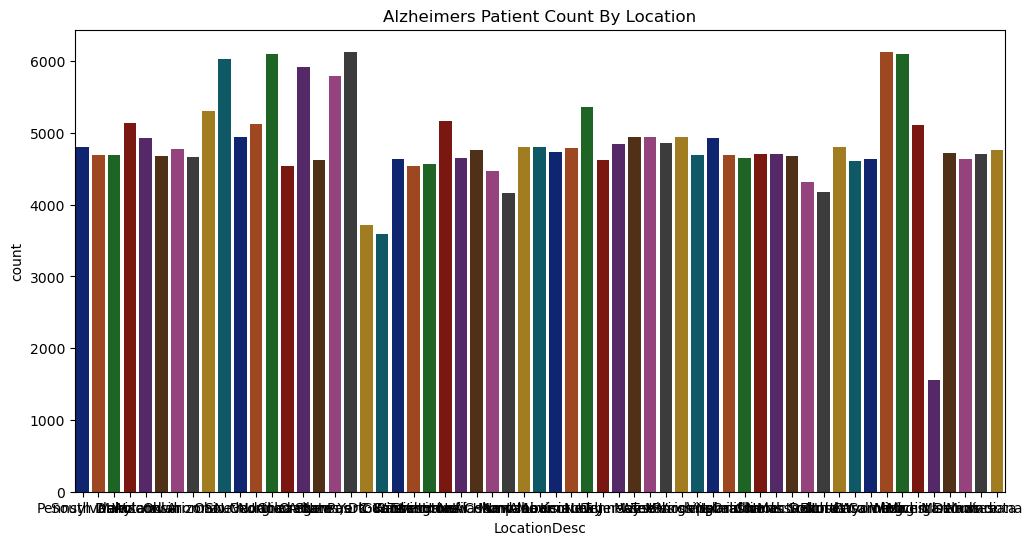

In [43]:
#Univariate Analysis
location = df1["LocationDesc"].unique()
print("unique positions :",location)
plt.figure(figsize=(12,6))
plt.title("Alzheimers Patient Count By Location")
sns.countplot(x = "LocationDesc",data = df1,hue="LocationDesc",palette = "dark")

**DATA STORY: According to countplot analysis: In United States,DC& Territoies has got the highest number of patients(6132) followed by West,Northeast,etc.The lowest number of patients are in Virgin Islands(1556)**

In [45]:
df1["Class"].value_counts()

Class
Overall Health                         96753
Screenings and Vaccines                62153
Nutrition/Physical Activity/Obesity    33194
Caregiving                             25493
Mental Health                          22184
Smoking and Alcohol Use                22183
Cognitive Decline                      22182
Name: count, dtype: int64

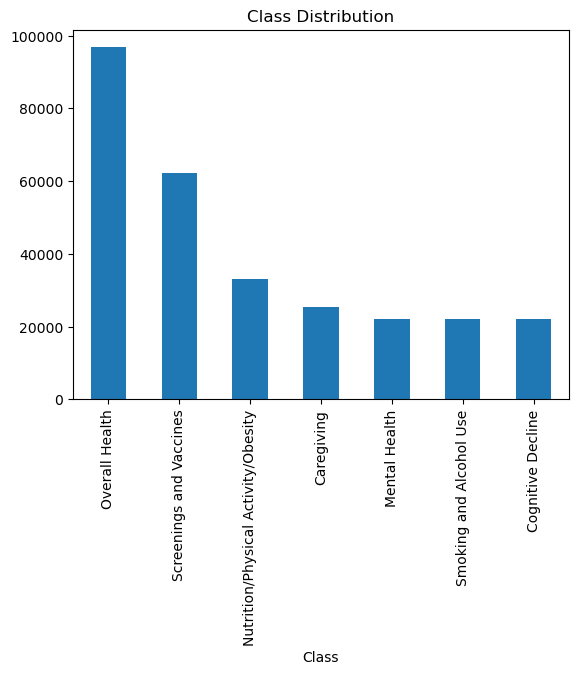

In [47]:
# Checking class distribution
df1['Class'].value_counts().plot(kind='bar', title="Class Distribution")
plt.show()

**Out of the 7 classes most of the patients are in overall health class.Lowest no.of patients are in mental health,smoking and alcohol use and in cognitive decline class**

### Bivariariate Analysis

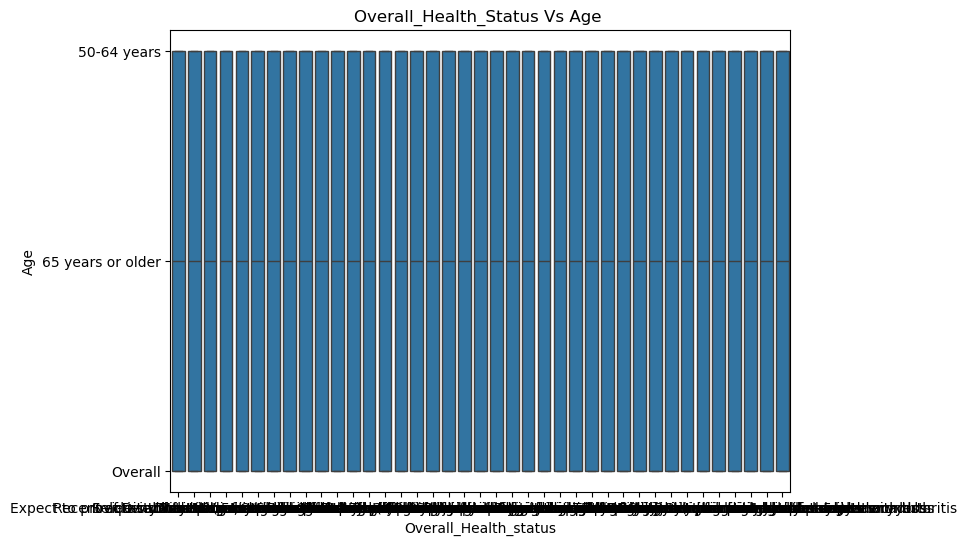

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Overall_Health_Status', y='Age')
plt.title('Overall_Health_Status Vs Age ')
plt.xlabel('Overall_Health_status')
plt.ylabel('Age')
plt.show()

**Out of the 3groups in the age column most of the patients are coming under50-64 years.**

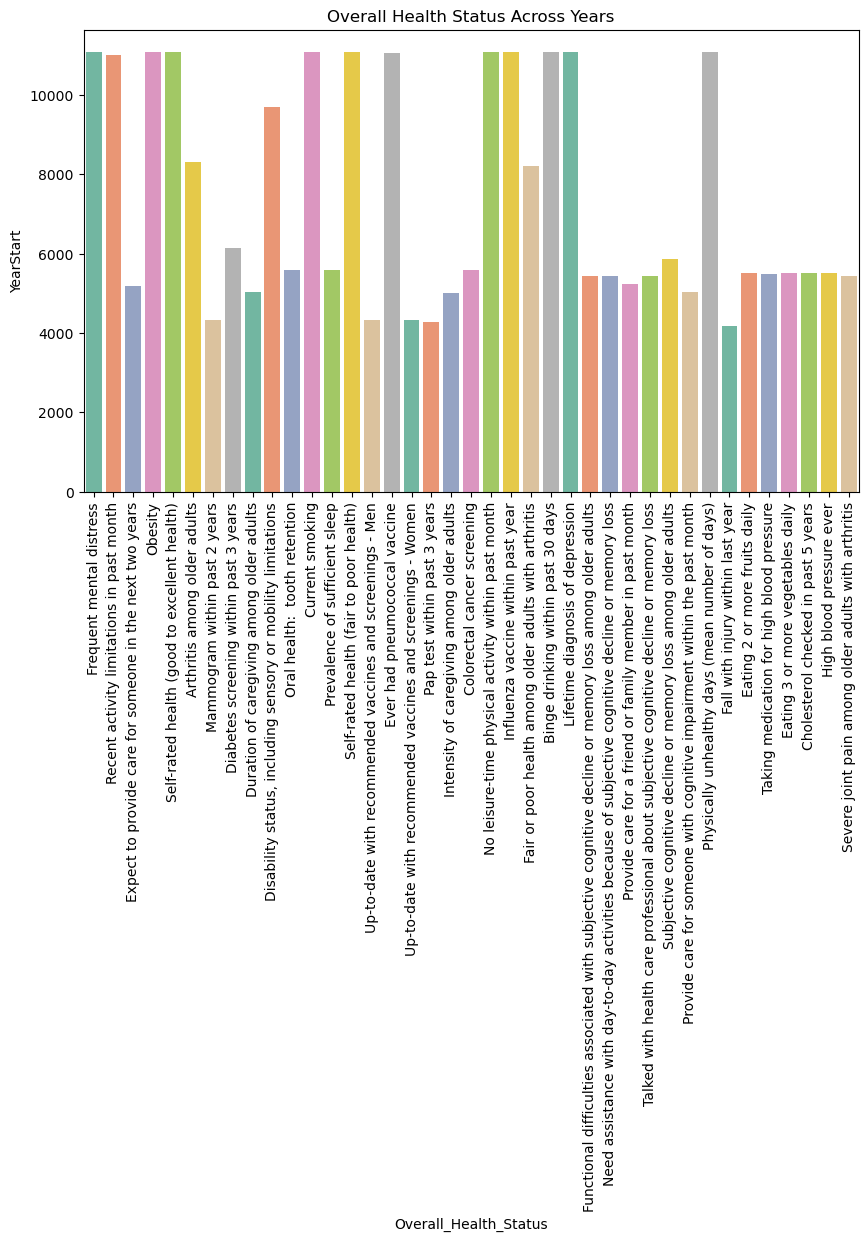

In [51]:
#Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Overall_Health_Status', hue='Overall_Health_Status', palette='Set2')
plt.title('Overall Health Status Across Years')
plt.xlabel('Overall_Health_Status')
plt.ylabel('YearStart')

plt.xticks(rotation=90)
plt.show()

**Data Story:Out of the 39 questions asked 12 questions were answered by most of the patients.**

In [53]:
#list down the unique values in each feature and find its length.

for column in df1.columns:
    unique_values = df1[column].unique()
    unique_length = len(unique_values)
    print(f"{column}: {unique_values}, Length: {unique_length}")


RowId: ['BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE'
 'BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE'
 'BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE' ...
 'BRFSS~2019~2019~56~Q17~TAC01~AGE~OVERALL'
 'BRFSS~2018~2018~56~Q18~TSC08~AGE~OVERALL'
 'BRFSS~2016~2016~56~Q32~TOC07~AGE~OVERALL'], Length: 36046
YearStart: [2022 2021 2017 2015 2019 2018 2016 2020], Length: 8
YearEnd: [2022 2021 2017 2015 2019 2018 2016 2020], Length: 8
LocationAbbr: ['PA' 'SD' 'ID' 'MD' 'WI' 'IA' 'OK' 'AZ' 'OH' 'SOU' 'NV' 'GA' 'NRE' 'CO'
 'OR' 'AR' 'NY' 'US' 'PR' 'GU' 'KS' 'WA' 'VT' 'HI' 'DC' 'AK' 'NH' 'MT'
 'NM' 'AL' 'LA' 'KY' 'UT' 'NJ' 'TN' 'ME' 'TX' 'WV' 'MS' 'RI' 'VA' 'NE'
 'CA' 'IL' 'CT' 'ND' 'MA' 'FL' 'SC' 'NC' 'WY' 'WEST' 'MDW' 'MI' 'VI' 'MO'
 'DE' 'MN' 'IN'], Length: 59
LocationDesc: ['Pennsylvania' 'South Dakota' 'Idaho' 'Maryland' 'Wisconsin' 'Iowa'
 'Oklahoma' 'Arizona' 'Ohio' 'South' 'Nevada' 'Georgia' 'Northeast'
 'Colorado' 'Oregon' 'Arkansas' 'New York'
 'United States, DC & Territories' 'Puerto Rico' 'Guam' 'Kansas'
 

**Data Story: The following details are got from the above iteration:The period of the collection of data is 8 years i.e 2015-2022.
The data is collected from 59 locations.Datasource is BRFSS.There are 7 classes.There are 39 types in overall health status
 and 39 questions were asnwered.**

## 5.FInding And Handling Outliers

An outlier is a data point that significantly deviates from the majority of the dataset. It is an observation that lies outside 
the expected range or distribution, often because of variability in the data, measurement errors, or anomalies.

Characteristics of Outliers: They are far from the mean or median of the data. They can skew statistical analyses, leading to misleading results. Identifying and handling outliers is critical in data preprocessing to ensure accurate model performance.

We can detect the outliers using following methods and can remove it using methods like trimming / capping/ imputation using mean or median a)IQR(Inter quartile range method) b) Mean and Standard deviation c)Percentile method   d) Z Score method.

After ploting the box plot I'll check the Outliers using IQR Method and Percentile Method.

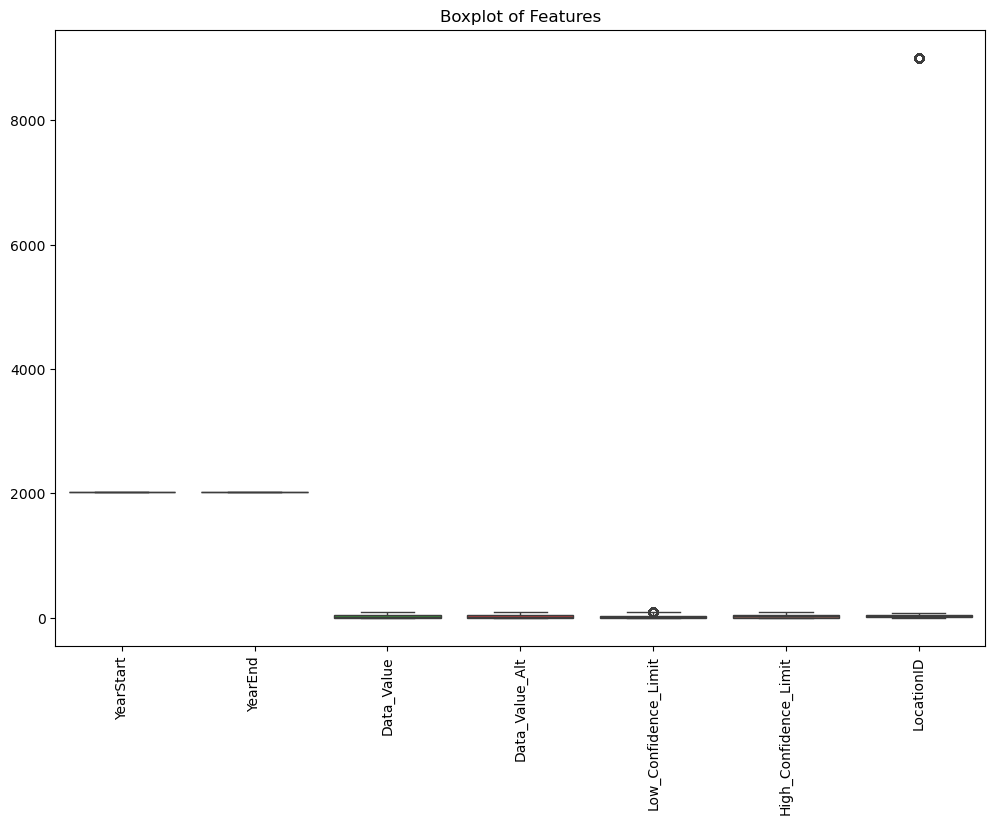

In [55]:
#Check outliers of the data
#Display boxplot of numerical columns
plt.figure(figsize=(12,8))
sns.boxplot(df1)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

**There are large no.of outliers in low confidence limit and locationID columns.**

**IQR Method**

In [57]:
#finding outliers

def remove_outliers(df1,columns):
  data_filtered=df1.copy()

  for column in columns:
     Q1 = df1[column].quantile(0.25)
     Q3 = df1[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered

In [59]:
new_df1=remove_outliers(df1,['YearStart','YearEnd','Data_Value','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit','LocationID'])
new_df1

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Overall_Health_Status,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


**After removing outliers using IQR there are only 256352  rows and 29 columns in the new_df1.**



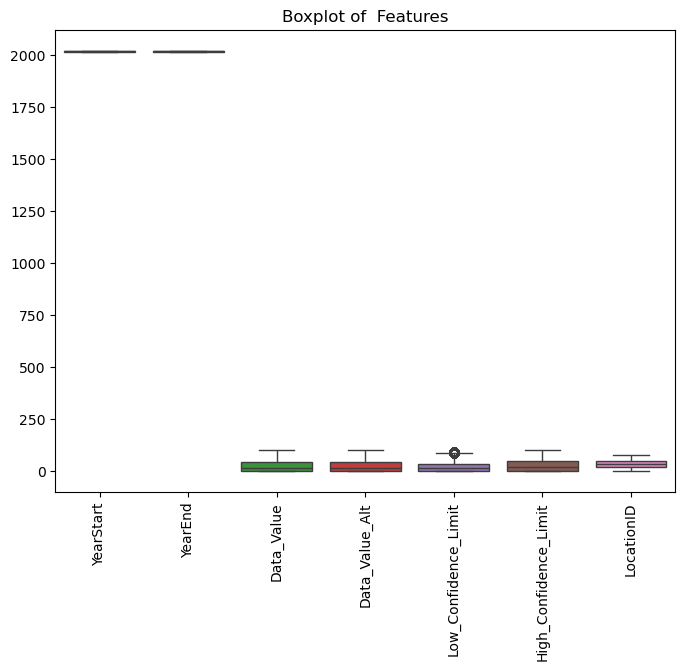

In [61]:
# Visualization of outliers after removing outliers of different features using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(new_df1)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

### Considerable decrease in Outliers after using IQR Method

### Percentile Method

In [63]:
# # c) Percentile Method
q1 = new_df1['Low_Confidence_Limit'].quantile(0.01)
q99 = new_df1['Low_Confidence_Limit'].quantile(0.99)
outliers_percentile = new_df1[(df1['Low_Confidence_Limit'] < q1) | (new_df1['Low_Confidence_Limit'] > q99)]

# Remove or cap outliers
data1_trimmedpercentile = new_df1[(new_df1['Low_Confidence_Limit'] >= q1) & (new_df1['Low_Confidence_Limit'] <= q99)]
data1_trimmedpercentile

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Overall_Health_Status,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


**After removing outliers using Percentile Method there are only 253810 rows and 29 columns in the data1_trimmedpercentile.**

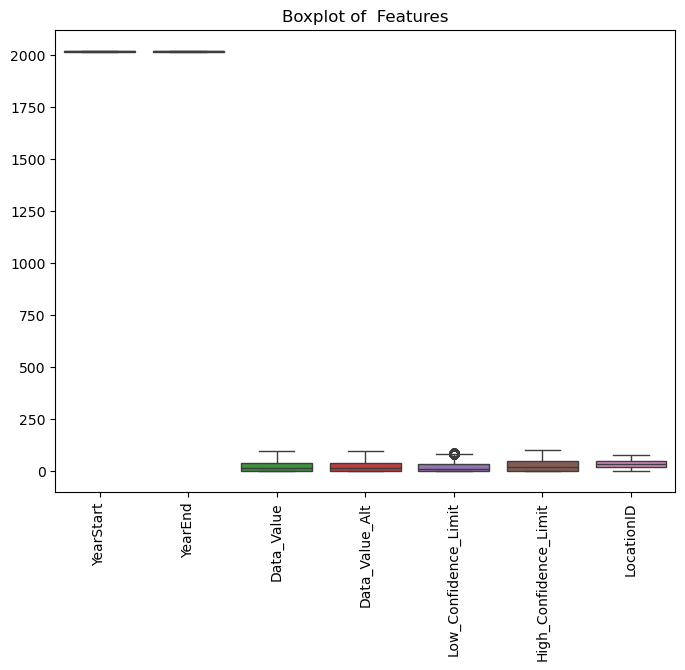

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(data1_trimmedpercentile)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

**Outliers are removed from location ID **

In [67]:
# Differentiating Columns
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['RowId', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Overall_Health_Status', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'StratificationCategory1', 'Age', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'AgeGroup', 'StratificationCategoryID2', 'StratificationID2']
Numerical Columns: ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'LocationID']


In [69]:
#Printing the shape of the Dataset during data loading
df.shape

(284142, 31)

In [71]:
#Printing the shape of the after datapreprocessing
df1.shape

(284142, 29)

### Feature Engineering

### 6.Encoding Categorical Data

Converting categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [73]:
#Creating a copy of data
data1=df1.copy()
data1.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Overall_Health_Status,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


**Label Encoding**

In [75]:
 #1. Label Encoding for ordinal categorical variables
# This is appropriate for ordinal data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['RowId', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Overall_Health_Status', 'Question',
                    'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'StratificationCategory1', 'Age', 'StratificationCategory2', 
                    'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'AgeGroup',
                    'StratificationCategoryID2', 'StratificationID2'
]

# Perform label encoding in one step
for col in categorical_cols:
    data1[col] = data1[col].astype('str')
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col])

print("Label Encoded DataFrame:")
print(data1.head())


Label Encoded DataFrame:
   RowId  YearStart  YearEnd  LocationAbbr  LocationDesc  Datasource  Class  \
0  34329       2022     2022            41            41           0      2   
1  34572       2022     2022            45            46           0      2   
2  32385       2022     2022            14            13           0      2   
3  32991       2022     2022            21            21           0      2   
4  35182       2022     2022            56            57           0      2   

   Overall_Health_Status  Question  Data_Value_Unit  ...  Stratification2  \
0                     14        14                0  ...                6   
1                     14        14                0  ...                1   
2                     14        14                0  ...                2   
3                     14        14                0  ...                2   
4                     14        14                0  ...                5   

   Geolocation  ClassID  TopicID  Que

**OneHot Encoding**

In [77]:
#2. One-Hot Encoding for non-ordinal categorical variables
categorical_cols = [ 
    'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Overall_Health_Status',
    'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 
     'StratificationCategory1','Data_Value_Unit', 'StratificationCategory2', 'Stratification2', 'Geolocation', 
    'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'AgeGroup', 
    'StratificationCategoryID2', 'StratificationID2'
]

# Apply one-hot encoding
data1_one_hot = pd.get_dummies(data1, columns=categorical_cols)

print("One-Hot Encoded DataFrame:")
print(data1_one_hot.head())

One-Hot Encoded DataFrame:
   RowId  YearStart  YearEnd  Data_Value  Data_Value_Alt  \
0  34329       2022     2022         0.0             0.0   
1  34572       2022     2022         0.0             0.0   
2  32385       2022     2022         0.0             0.0   
3  32991       2022     2022         9.0             9.0   
4  35182       2022     2022         5.6             5.6   

   Low_Confidence_Limit  High_Confidence_Limit  Age  LocationID  \
0                   0.0                    0.0    0          42   
1                   0.0                    0.0    1          46   
2                   0.0                    0.0    1          16   
3                   6.5                   12.3    1          24   
4                   4.4                    7.2    1          55   

   LocationAbbr_0  ...  StratificationCategoryID2_1  \
0           False  ...                        False   
1           False  ...                        False   
2           False  ...                      

**Checking Skewness and Kurtosis**

In [79]:
#Checking skewness and kurtosis after converting the categorical columns into numerical after encoding
All_cols = data1.select_dtypes(include=['number']).columns.tolist()

# Compute skewness & kurtosis
skewness = data1[All_cols].skew()
kurtosis = data1[All_cols].kurt()

# Combine into DataFrame
normality_stats = pd.DataFrame({"Skewness": skewness, "Kurtosis": kurtosis})

# Reset index and sort by Skewness in descending order
normality_stats_sorted = normality_stats.reset_index().rename(columns={"index": "Feature"})
normality_stats_sorted = normality_stats_sorted.sort_values(by="Skewness", ascending=False)

# Display table with formatting (works in Jupyter Notebook)
display(normality_stats_sorted.style.format(precision=4))

,Feature,Skewness,Kurtosis
9,Data_Value_Unit,3.1536,7.9451
24,LocationID,2.9594,6.7588
14,Low_Confidence_Limit,1.0642,0.0888
13,Data_Value_Alt,0.8665,-0.3945
12,Data_Value,0.8665,-0.3945
15,High_Confidence_Limit,0.6887,-0.7853
21,ClassID,0.6681,-0.7864
23,QuestionID,0.0569,-1.0733
20,Geolocation,0.0486,-1.2747
0,RowId,0.0103,-1.1949


**Skewness:skewness< 0.5: Fairly symmetrical.
(Geolocation,RowId,Stratification2,StratificationCategoryID1,Datasource,StratificationCategory1,
TopicID,Age,AgeGroup,,StratificationID2,Overall_Health_Status,LocationDesc,LocationAbbr,YearEnd,YearStart,Question,Class,StratificationCategoryID2,
StratificationCategory2,Data_Value_Type,DataValueTypeID)

0.5< |Skewnss|  < 1: Moderately sewedw(Data_Value_Alt,Data_Value,High_Confidence_Limit,ClassID),.
.
 |Skewess| > 1: Higkeskeyedke(Data_Value_Unit,LocationID,Low_Confidence_miLe)**d.

**Kurtosis near 0: Distribution is close to normal.
Positive Kurtosis: Indicates a leptokurtic distribution (heavier tails, more outliers). Higher positive values mean more extreme outliers. A value above 3 (excess kurtosis) is often considered a sign of significant leptokurtosis. Since kurtosis of normal distribution is 3, excess kurtosis is defined as kurtosis - 3. If kurtosis is greater than 3, then excess kurtosis is positive.
Negative Kurtosis: Indicates a platykurtic distributi**on 

In [81]:
# Correlation with target variable
print(data1.corr()['Overall_Health_Status'].sort_values(ascending=False))

Overall_Health_Status        1.000000
Data_Value_Unit              0.252495
Question                     0.161823
TopicID                      0.052176
QuestionID                   0.042188
StratificationCategoryID2    0.025564
LocationID                   0.012330
YearEnd                      0.010472
StratificationCategory2      0.009068
StratificationID2            0.007062
LocationAbbr                 0.006241
LocationDesc                 0.005786
RowId                        0.000458
Age                          0.000435
AgeGroup                     0.000435
Stratification2             -0.002889
YearStart                   -0.003571
Geolocation                 -0.007476
High_Confidence_Limit       -0.027803
Data_Value_Alt              -0.033503
Data_Value                  -0.033503
Low_Confidence_Limit        -0.037638
ClassID                     -0.104515
Data_Value_Type             -0.252495
DataValueTypeID             -0.252495
Class                       -0.255524
Datasource  

### 7.Feature Selection

In [83]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif 
import pandas as pd

#Separate categorical and numerical features

categorical_cols = data1.select_dtypes (include=['object', 'bool']).columns

numerical_cols = data1.select_dtypes (include=['int64', 'float64']).columns

X_categorical= data1[categorical_cols]

X_numerical = data1[numerical_cols]

y = data1['Overall_Health_Status']

#ANOVA for numerical features

f_selector = SelectKBest(f_classif, k=10) # K represents number of features.

X_f = f_selector.fit_transform(X_numerical,y)

f_selected_features = X_numerical.columns[f_selector.get_support()]

print("All columns",data1.columns)

print("ANOVA selected features:", f_selected_features)

All columns Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Overall_Health_Status', 'Question',
       'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Age', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'AgeGroup',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')
ANOVA selected features: Index(['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'LocationID'],
      dtype='object')


**Checking Multicolinearity Using HeatMap**

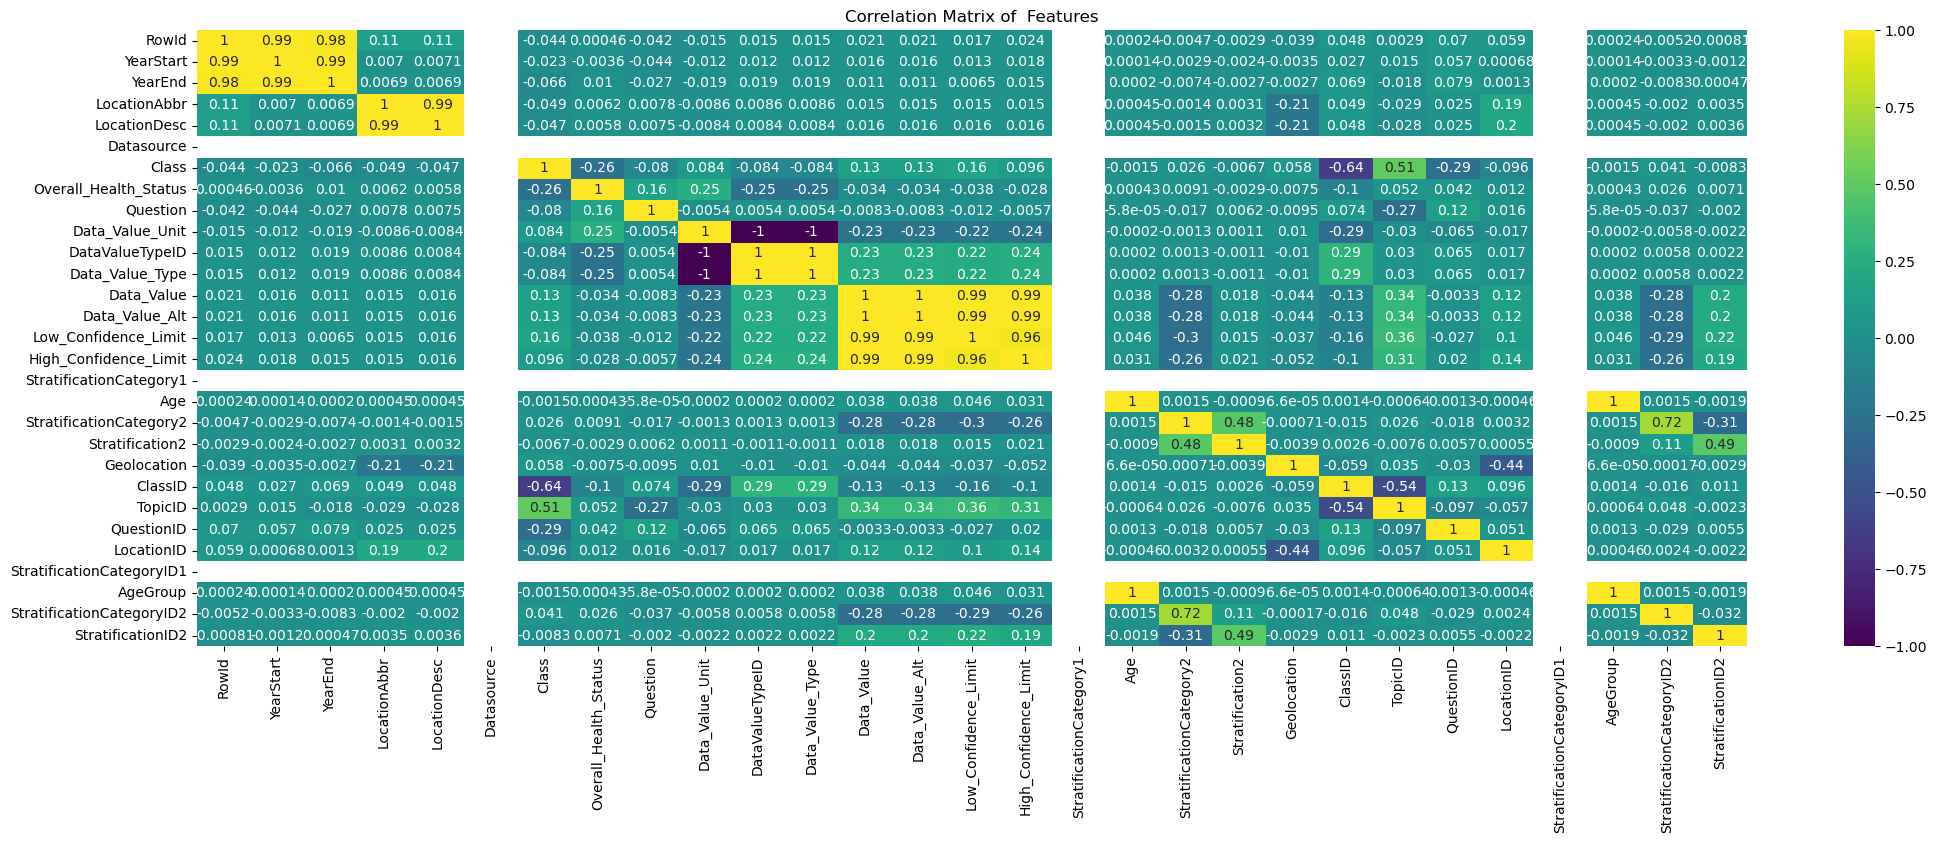

In [85]:
# Correlation Matrix 
# heatmap will help you understand relationships between features
# we can check multi collinearity
plt.figure(figsize=(25,8))
sns.heatmap(data1.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

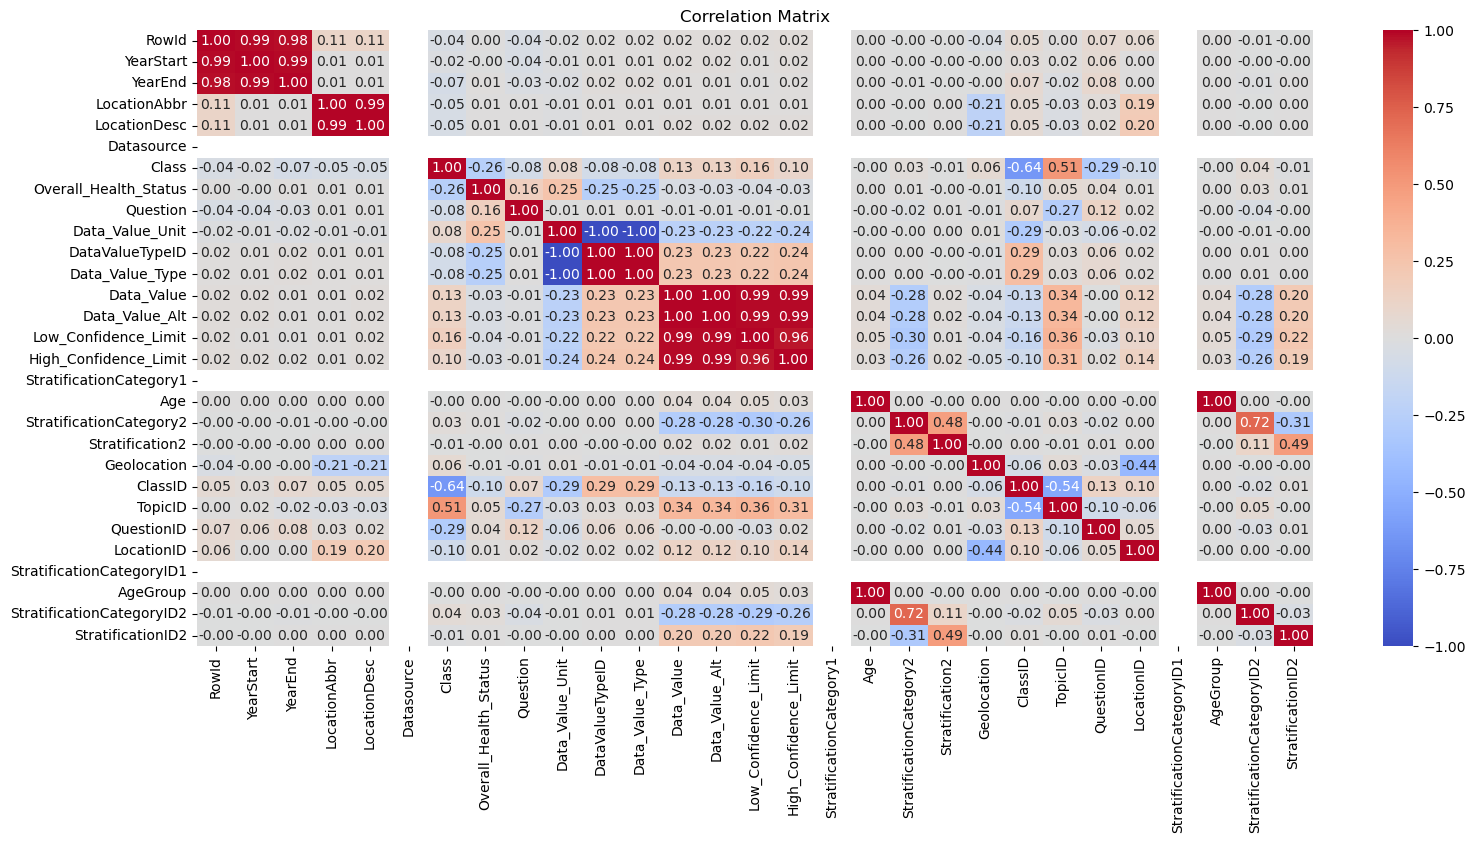

In [87]:
#for more clarity plotting another heat map
# Calculate correlation matrix
corr_matrix = data1.corr()

# Plot correlation heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Data Story: A value close to +1 indicates a strong positive linear relationship, meaning as one feature increases, the other feature also tends to increase. A value close to -1 indicates a strong negative linear relationship, meaning as one feature increases, the other feature tends to decrease. A value around 0 indicates no significant linear relationship between the features.**

In [ ]:
**In the above plots RowId,Yearstart,YearEnd,LocationAbbr,LocationDesc, DataValueTypeID, Data_Value_Type, Data_Value, Data_Value_Alt
Low_Confidence_Limit & High_Confidence_Limit are highly correlated.**

In [89]:
#Dropping highly correlated columns (insights from heatmap)
data1.drop(['RowId','YearEnd','LocationAbbr','DataValueTypeID','Data_Value_Alt','High_Confidence_Limit',],axis=1,inplace=True)

**Reasons to Drop Highly Correlated Columns**
Highly correlated columns provide similar information, which can lead to redundancy. Keeping them might not add significant value and
could complicate models.

In [91]:
# Select features with high correlation to the target
corr_with_target = corr_matrix['Overall_Health_Status'].abs().sort_values(ascending=False)
relevant_features = corr_with_target[corr_with_target > 0.5].index.tolist()

# Retain only relevant features
df_filtered = data1[relevant_features]

print("Relevant Features based on Correlation:")
print(relevant_features)

Relevant Features based on Correlation:
['Overall_Health_Status']


In [93]:
# List of desired columns from feature selection
selected_columns =['YearStart','LocationDesc',
       'Class','Overall_Health_Status',
       'Data_Value_Unit','Data_Value_Type','Data_Value',
       'Low_Confidence_Limit','Age',
       'Stratification2','AgeGroup',
       ]

# Create a new DataFrame with only the selected columns
new_data_2 = data1[selected_columns]
new_data_2

,YearStart,LocationDesc,Class,Overall_Health_Status,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,Age,Stratification2,AgeGroup
0,2022,41,2,14,0,1,0.0,0.0,0,6,0
1,2022,46,2,14,0,1,0.0,0.0,1,1,1
2,2022,13,2,14,0,1,0.0,0.0,1,2,1
3,2022,21,2,14,0,1,9.0,6.5,1,2,1
4,2022,57,2,14,0,1,5.6,4.4,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
284137,2016,57,5,3,0,1,70.7,55.8,2,2,2
284138,2017,58,4,12,0,1,0.0,0.0,0,4,0
284139,2015,58,1,36,0,1,0.0,0.0,2,1,2
284140,2019,56,4,6,0,1,0.0,0.0,1,4,1


In [95]:
new_data_2.shape

(284142, 11)

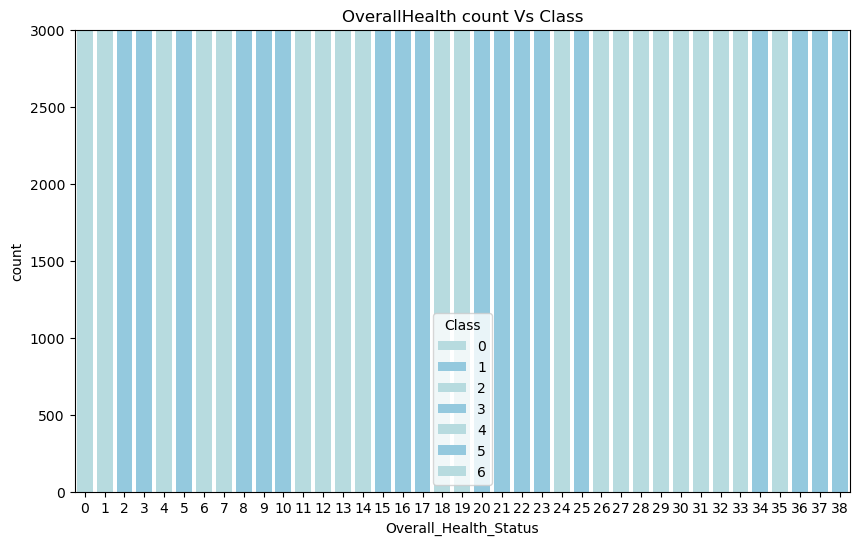

In [97]:
# The graph type is a grouped bar chart (or clustered bar chart)
fig = plt.figure(figsize = (10,6)) #Create a figure and axes
ax = sns.countplot(data =new_data_2, x = 'Overall_Health_Status', hue = 'Class', palette = ['powderblue', 'skyblue'])
plt.ylim(0,3000) #Set y-axis limits and title
plt.title('OverallHealth count Vs Class')
for container in ax.containers: #Add bar labels
  ax.bar_label(container)
plt.show() #Show the plot

### 8.Splitting The Dataset into Training and Testing Sets

In [99]:
#  define the features (X) and target (y)

from sklearn.model_selection import train_test_split

X =new_data_2.drop('Overall_Health_Status',axis=1)
y = new_data_2['Overall_Health_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227313, 10) (56829, 10) (227313,) (56829,)


### 9.Feature Scaling

 Standardization is a form of feature scaling where each feature is rescaled to have a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms are sensitive to the scale of the input variables. If some features have a much larger range than others, they might dominate the model during training, leading to inaccurate or biased results. Standardization ensures that all features are on the same scale, which can improve the performance of many machine learning algorithms.

### StandardScaler

In [101]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.56162192e+00, -1.67223462e+00, -3.01537401e-01, ...,
        -1.22435671e+00,  6.54540112e-01, -1.22435671e+00],
       [ 1.47772798e+00, -1.61303233e+00, -8.93924820e-01, ...,
        -1.59761849e-03,  1.08802760e+00, -1.59761849e-03],
       [-1.12742908e+00, -1.61303233e+00, -3.01537401e-01, ...,
        -1.22435671e+00, -2.12434861e-01, -1.22435671e+00],
       ...,
       [-6.93236237e-01, -1.43542546e+00,  2.90850019e-01, ...,
        -1.59761849e-03,  1.08802760e+00, -1.59761849e-03],
       [ 1.75149450e-01, -1.13941402e+00, -8.93924820e-01, ...,
         1.22116148e+00,  6.54540112e-01,  1.22116148e+00],
       [-6.93236237e-01, -1.67223462e+00, -8.93924820e-01, ...,
        -1.59761849e-03,  1.52151509e+00, -1.59761849e-03]])

In [103]:
X_train_scaled.shape,X_train.shape

((227313, 10), (227313, 10))

In [105]:
from sklearn.preprocessing import StandardScaler

y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)
y_train_scaled

array([[-0.85358908],
       [ 0.05319312],
       [ 0.32522778],
       ...,
       [ 1.05065353],
       [-0.40019798],
       [-0.40019798]])

In [107]:
print(y_train.shape,y_train_scaled.shape)

(227313,) (227313, 1)


In [109]:
#SMOTE (Synthetic Minority Over-sampling Technique) is a widely used over-sampling technique to handle imbalanced datasets,
#particularly when dealing with minority classes (e.g., a disease, a defect, etc.). SMOTE generates synthetic samples from the minority 
#class by interpolating between existing instances.

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 

# Applying SMOTE
print("Original Class Distribution:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled Class Distribution:", pd.Series(y_train).value_counts())

Original Class Distribution: Overall_Health_Status
23    8970
14    8893
17    8893
32    8878
22    8878
31    8874
26    8870
1     8824
19    8824
4     8814
30    8810
10    8777
6     7834
0     6619
12    6557
5     4926
34    4686
27    4507
24    4502
3     4473
9     4440
16    4438
2     4409
35    4389
33    4384
8     4375
21    4356
15    4350
36    4331
28    4194
11    4120
18    4018
7     3999
29    3998
37    3497
25    3431
38    3429
20    3427
13    3319
Name: count, dtype: int64
Resampled Class Distribution: Overall_Health_Status
9     8970
26    8970
36    8970
15    8970
5     8970
17    8970
37    8970
21    8970
29    8970
32    8970
10    8970
8     8970
7     8970
34    8970
24    8970
20    8970
2     8970
33    8970
6     8970
14    8970
19    8970
16    8970
22    8970
30    8970
13    8970
1     8970
3     8970
31    8970
0     8970
38    8970
12    8970
35    8970
23    8970
28    8970
18    8970
4     8970
27    8970
11    8970
25    8970
Name: count, 

In [114]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib
# Training and evaluating the models
# included a DL model
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    
}

results = {}

# Train and evaluate models on selected features
for name, model in models.items():
    pipeline = ImbPipeline([
        ('smote', smote),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.0930
Ridge Classifier Accuracy: 0.1300
Random Forest Accuracy: 0.4645
Gradient Boosting Accuracy: 0.5144
K-Nearest Neighbors Accuracy: 0.3118


In [116]:
# Selecting the best model
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

Best Model: Gradient Boosting with Accuracy: 0.5144


**From the above findings I came to the conclusion that Gradient Boosting (Accuracy: 0.5144 )is the Best Model for this data.**

### Hyperparameter Tuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.datasets import make_classification 


# .  Define the model (GradientBoostingClassifier)
model = GradientBoostingClassifier(random_state=42)  

# . Define the hyperparameter search space
param_distributions = {
    'n_estimators': np.arange(100, 501, 50),  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Common learning rate values
    'max_depth': np.arange(3, 8),            #  Depth from 3 to 7
    'min_samples_split': np.arange(2, 11),      #  Minimum samples for split
    'min_samples_leaf': np.arange(1, 6),        # Minimum samples for leaf
    'subsample': [0.7, 0.8, 0.9, 1.0],         # Subsample values
    'loss': ['deviance', 'exponential']          # Consider both loss functions
}

#  Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,  
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=3,  # Number of cross-validation folds
    random_state=42,  # for reproducibility
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print progress updates
)

#  Run the search
random_search.fit(X_train, y_train)

#  Analyze the results
print("Best hyperparameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

#  Get the best model
best_model = random_search.best_estimator_

#  Evaluate on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) # Using accuracy_score
print("Test accuracy with best hyperparameters:", test_accuracy)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters: {'subsample': 1.0, 'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 6, 'loss': 'exponential', 'learning_rate': 0.2}
Best accuracy: 0.9050153473571569
Test accuracy with best hyperparameters: 0.915


**AUC-ROC**

In [128]:
from sklearn.metrics import roc_auc_score
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
#Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

#  Print the Result
print(f"AUC-ROC Score: {auc_roc:.4f}")  



AUC-ROC Score: 0.9348


**An AUC-ROC score of 0.9348 is quite high. This means that the model is very good at distinguishing between the positive and negative classes. In practical terms, when presented with a random positive instance and a random negative instance, there is approximately a 93.48% chance that the model will rank the positive instance higher than the negative instance.**

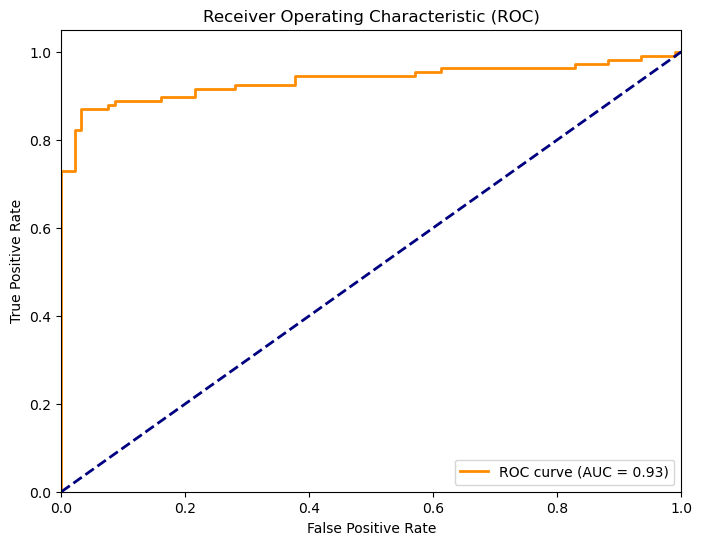

In [130]:
#  Plotting the ROC Curve ---
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Creating The Pipeline With GradientBoostingClassifier

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification  


# . Create the Pipeline with GradientBoostingClassifier
pipeline = ImbPipeline([
    ('scaler', scaler),  
    ('smote', smote),              
    ('model', GradientBoostingClassifier(  # Use GradientBoostingClassifier
        n_estimators=100,  
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])


#  Fit and Predict
pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)

#  Evaluate
print(f"Pipeline Model Accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}")

Pipeline Model Accuracy: 0.9000


**Saving The Model**

In [136]:
#Saving the pipeline
joblib.dump(pipeline, "Classifier.joblib")

['Classifier.joblib']